In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [3]:
df = pd.read_csv('survey.csv')
#df.head()

# Keep important columns only
cols = ['Age', 'Gender', 'family_history', 'work_interfere',
        'no_employees', 'remote_work', 'tech_company', 'benefits',
        'care_options', 'wellness_program', 'seek_help', 'anonymity', 
        'leave', 'mental_health_consequence', 'phys_health_consequence',
        'coworkers', 'supervisor', 'mental_health_interview',
        'phys_health_interview', 'mental_vs_physical', 'obs_consequence',
        'treatment']

df = df[cols]
df = df.dropna()


In [4]:
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])


In [5]:
X = df.drop('treatment', axis=1)
y = df['treatment']  # 1 = needs treatment, 0 = doesn't


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(X_train.shape[1])  # should show 21
print(X_train.columns.tolist())  # shows feature names



In [8]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7738693467336684

Confusion Matrix:
 [[ 44  21]
 [ 24 110]]

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.68      0.66        65
           1       0.84      0.82      0.83       134

    accuracy                           0.77       199
   macro avg       0.74      0.75      0.75       199
weighted avg       0.78      0.77      0.78       199



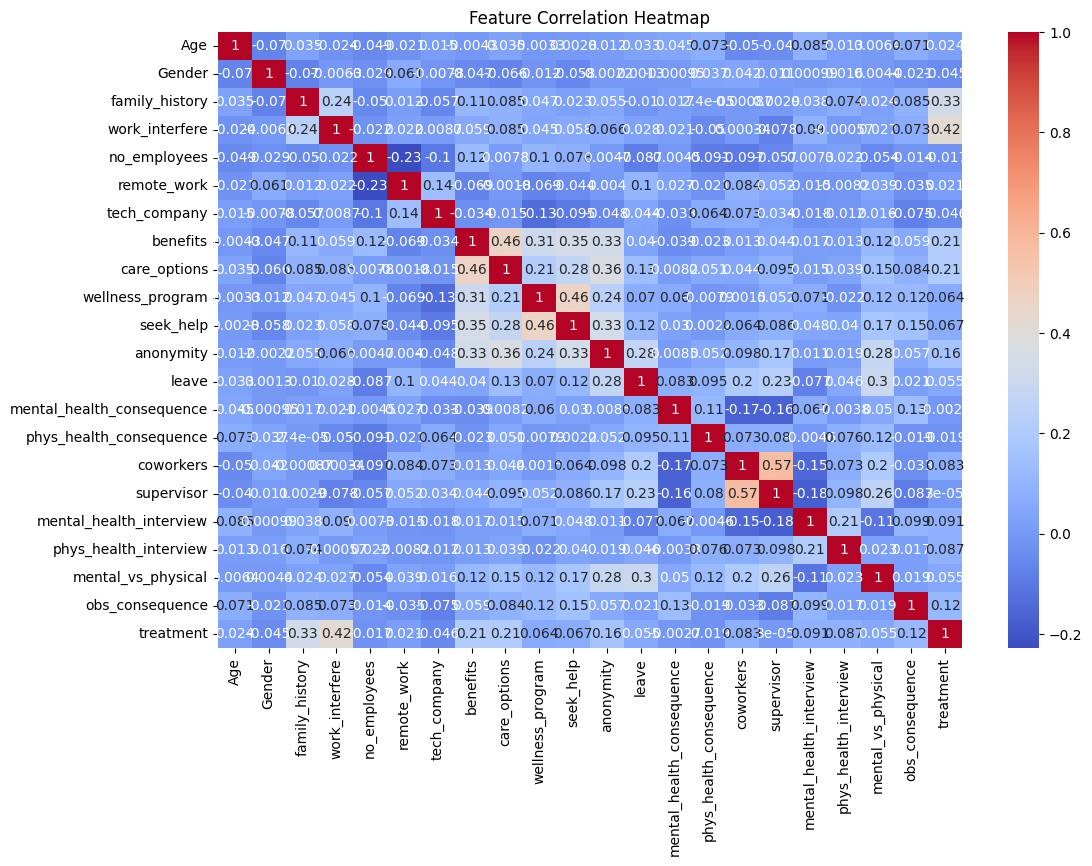

In [9]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


In [10]:
# ✅ 1. Make sure required packages are imported
import os
import joblib

# ✅ 2. Create the folder if it doesn't exist
os.makedirs("mental_health", exist_ok=True)

# ✅ 3. Save your trained model inside that folder
joblib.dump(model, "mental_health/mental_health_treatment_model.pkl")

print("✅ Model saved as 'mental_health_treatment_model.pkl' inside 'mental_health' folder.")


✅ Model saved as 'mental_health_treatment_model.pkl' inside 'mental_health' folder.


In [11]:
import shutil

shutil.move("mental_health/mental_health_treatment_model.pkl", "mental_health/mental_health_treatment_model.pkl")


'mental_health/mental_health_treatment_model.pkl'

In [13]:
import os

# Create 'mental' folder if it doesn't exist
os.makedirs("mental", exist_ok=True)

# Move model file there
import shutil
shutil.move("mental_health/mental_health_treatment_model.pkl", "mental/mental_health_treatment_model.pkl")

print("✅ Model moved to 'mental' folder.")



✅ Model moved to 'mental' folder.


In [4]:
import os

# Where am I?
print("📂 Current folder:", os.getcwd())
print("📁 Inside it:", os.listdir())



📂 Current folder: c:\Users\komal\OneDrive\Desktop\ML\mental\mental
📁 Inside it: ['app.py', 'mental_health_treatment_model.pkl', 'my.ipynb', 'survey.csv']


In [6]:
!streamlit run app.py


^C
